In [2]:
# Import modules

# import urllib

import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import HTML
from matplotlib.animation import FuncAnimation

from IPython.display import YouTubeVideo, display, HTML
from base64 import b64encode

%matplotlib inline

In [124]:
plt.rcParams["figure.figsize"] = (14,7)


In [178]:
from IPython.display import HTML

HTML("""
<video width=1024 controls>
     <source src="../data/kitty.mov" type="video/mp4">
</video>
""")

In [187]:
def draw_rectangle(bbox, frame):
    p1 = (bbox[0], bbox[1])
    p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
    cv2.rectangle(frame, p1, p2, (255, 0, 0), 5, 1)
    return frame

def display_ractangle(bbox, frame):
    frame_c = frame.copy()
    frame_c = draw_rectangle(bbox, frame_c)
    plt.imshow(frame_c)
    plt.axis('off')

In [211]:
cap = cv2.VideoCapture('../data/kitty.mov')
ret, frame = cap.read()
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter('tracked_kitty.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 60, (width, height))

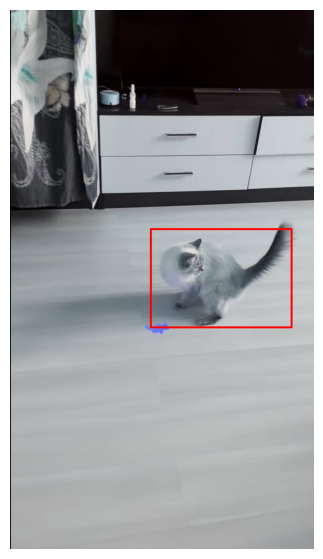

In [212]:
bbox = (500, 780, 500, 350)
display_ractangle(bbox, frame)

In [213]:
tracker_name = 'GOTURN'

tracker = cv2.TrackerGOTURN_create()

ok = tracker.init(frame, bbox)

In [214]:
while True:
    ret, frame = cap.read()
    if not ret:
        break
    ok, bbox = tracker.update(frame)
    if ok:
        draw_rectangle(bbox, frame)
    out.write(frame)
cap.release()
out.release()